In [1]:
#画像の読み込み
import cv2

img=cv2.imread("コケタニくん.jpg")
print(img)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [2]:
#画像の読み込みの失敗
img=cv2.imread('ijfaighaio.png')
print(img)

None


[ WARN:0@0.077] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('ijfaighaio.png'): can't open/read file: check file path/integrity


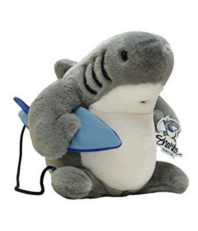

In [3]:
#画像を表示する
#opencvはBGRで表現
#matplotlibはRGBで表現

%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img=cv2.imread("コケタニくん.jpg")
#画像の目盛りを非表示
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(img)

plt.show()

In [4]:
img=cv2.imread("コケタニくん.jpg")
#画像の保存
cv2.imwrite("./out.jpg", img)

True

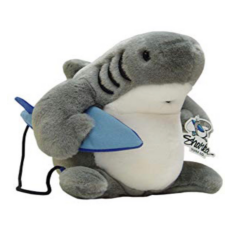

In [5]:
import matplotlib.pyplot as plt
import cv2

#画像の読み込み
img = cv2.imread("コケタニくん.jpg")

#画像のリサイズ
resized_img=cv2.resize(img, (600,600))
#リサイズした画像の保存
cv2.imwrite("resized_img.png", resized_img)

#画像の表示
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

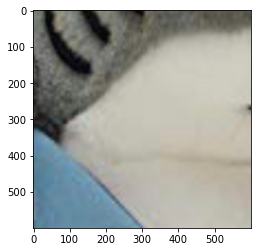

In [6]:
import matplotlib.pyplot as plt
import cv2

#画像の読み込み
img=cv2.imread("コケタニくん.jpg")

#画像の一部を切り取る
img2=img[300:500, 300:550]

#画像のリサイズ
img2=cv2.resize(img2,(600,600))

#リサイズした画像の保存
cv2.imwrite("cut_resized.png", img2)

#画像の表示
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
img2.shape

(600, 600, 3)

## 顔認識 
* Haar-like分類器 

対象となる特徴量を学習させて、学習データをもとにパターン認識を行うカスケード分類器の一種

In [3]:
import matplotlib.pyplot as plt
import cv2
import glob

#カスケードファイルを指定して検出器を作成(今回は正面の顔を検出)
cascade_file="haarcascade_frontalface_alt.xml"
cascade=cv2.CascadeClassifier(cascade_file)

#画像を読み込んでグレースケールに変換する
# imgs=["rena_site.png", "risa.png"]
# images_path="壁紙/*.jpg"
images_path="rena_site.png"

In [14]:
def face_detection(img):
    img=cv2.imread(img)
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img_gray=cv2.resize(img_gray, (300,300))

    #顔認識を実行
    face_list=cascade.detectMultiScale(img_gray, minSize=(65,65))

    #結果の確認
    if len(face_list)==0:
        print("顔認識できませんでした。")
        quit()

    #認識した部分に印をつける
    for (x, y, w, h) in face_list:
        print("顔の座標：", x, y, w, h)
        red=(0,0,255)
        cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=5)

    #画像を出力
#     cv2.imwrite("face_detected.png", img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

顔の座標： 490 404 147 147
顔の座標： 1007 727 70 70


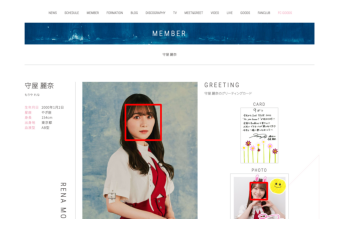

In [15]:
# for img in glob.glob(images_path):
# #     print(img)
#     face_detection(img)
face_detection(images_path)

In [6]:
#モザイク処理
import cv2

def mosaic(img, rect, size):
    #モザイクをかける領域の取得
    (x1,y1,x2,y2)=rect
    w=x2-x1
    h=y2-y1
    i_rect=img[y1:y2, x1:x2]
    
    #モザイク処理のため一度収縮して拡大する
    i_small=cv2.resize(i_rect, (size,size))
    plt.imshow(cv2.cvtColor(i_small, cv2.COLOR_BGR2RGB))
    plt.show()
    
    i_mos=cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
    plt.imshow(cv2.cvtColor(i_mos, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    #画像にモザイク処理を重ねる
    img2=img.copy()
    img2[y1:y2, x1:x2]=i_mos
    return img2

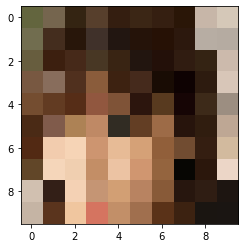

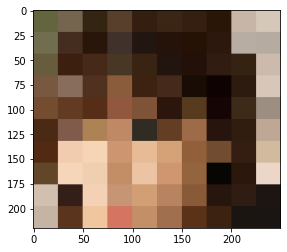

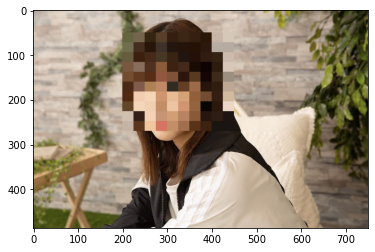

In [7]:
img=cv2.imread("risa.jpg")
mos=mosaic(img, (200,50,450,270), 10)

#モザイク処理した画像を保存
cv2.imwrite("risa_mosaic.jpg", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

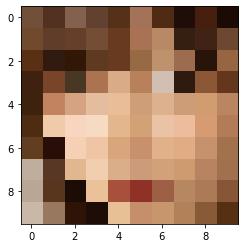

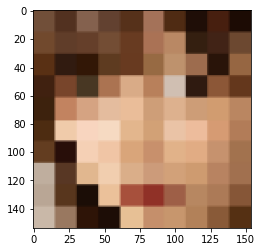

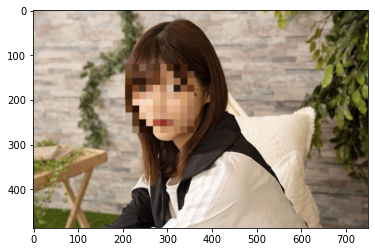

In [8]:
#顔にモザイク処理を施す

#顔認識
import cv2
import matplotlib.pyplot as plt

#カスケードファイルを指定して、分類器作成
cascade_file="haarcascade_frontalface_alt.xml"
cascade=cv2.CascadeClassifier(cascade_file)

#画像を読み込んどグレースケールに変換
# img=cv2.imread("rena_site.png")
img=cv2.imread("risa.jpg")

img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#顔検出実行
face_list=cascade.detectMultiScale(img_gray, minSize=(100,100))
if len(face_list)==0: quit()
    
#認識した部分にモザイク処理
for (x,y,w,h) in face_list:
    img=mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite("risa_mosaiced.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
face_list

array([[207, 121, 154, 154]], dtype=int32)

0
顔の座標： 208 123 151 151


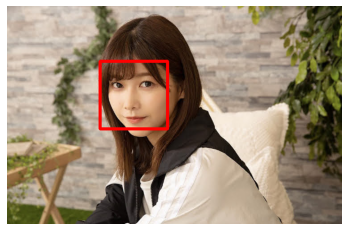

10
顔認識できませんでした。


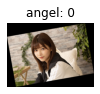

20
顔認識できませんでした。


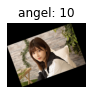

30
顔認識できませんでした。


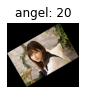

40
顔認識できませんでした。


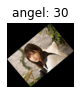

50
顔認識できませんでした。


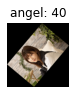

60
顔認識できませんでした。


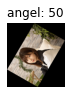

70
顔認識できませんでした。


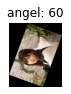

80
顔認識できませんでした。


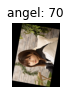

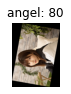

In [21]:
#画像を回転させると認識できるか
import cv2
from scipy import ndimage

img=cv2.imread("risa.jpg")

for i in range(0,9):
    ang=i*10
    print(str(ang))
    img_r=ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.title("angel: "+str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()

In [20]:
def face_detect(img):
#     img=cv2.imread(img)
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img_gray=cv2.resize(img_gray, (300,300))

    #顔認識を実行
    face_list=cascade.detectMultiScale(img_gray, minSize=(65,65))

    #結果の確認
    if len(face_list)==0:
        print("顔認識できませんでした。")
        quit()

    #認識した部分に印をつける
    for (x, y, w, h) in face_list:
        print("顔の座標：", x, y, w, h)
        red=(0,0,255)
        cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=5)

    #画像を出力
#     cv2.imwrite("face_detected.png", img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()